<a href="https://colab.research.google.com/github/Sejalakkaldev/HDS5210_InClassSejal/blob/master/Copy_of_week13_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Check in your data file along with this exercise. Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [8]:
import pandas as pd

# Path to the dataset file
file_path = "Health_Data_Insights.csv"

# Read the dataset
data = pd.read_csv(file_path)

# Display the number of rows and columns
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")


The dataset has 1000 rows and 10 columns.


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [9]:
import pandas as pd

# Load the dataset
file_path = "Health_Data_Insights.csv"
data = pd.read_csv(file_path)

# Calculate the number of unique values in each column
unique_values = data.nunique()

# Find the column with the most distinct values
most_diverse_column = unique_values.idxmax()
most_diverse_count = unique_values.max()

# Check if the most diverse column might be a unique identifier
if most_diverse_count == len(data):
    # Find the next most diverse column
    # Added indentation to the following line to fix the error
    unique_values_excluding_id = unique_values.drop(most_diverse_column)
    most_diverse_column = unique_values_excluding_id.idxmax()
    most_diverse_count = unique_values_excluding_id.max()

# Print the result
print(f"The column with the most distinct values (excluding potential ID): {most_diverse_column}")
print(f"Number of distinct values in this column: {most_diverse_count}")

The column with the most distinct values (excluding potential ID): Health_Score
Number of distinct values in this column: 425


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [10]:
# Identify columns where all the values are the same across all rows
constant_columns = [col for col in data.columns if data[col].nunique() == 1]

# Output the result
print("Columns with constant values:", constant_columns)


Columns with constant values: []


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

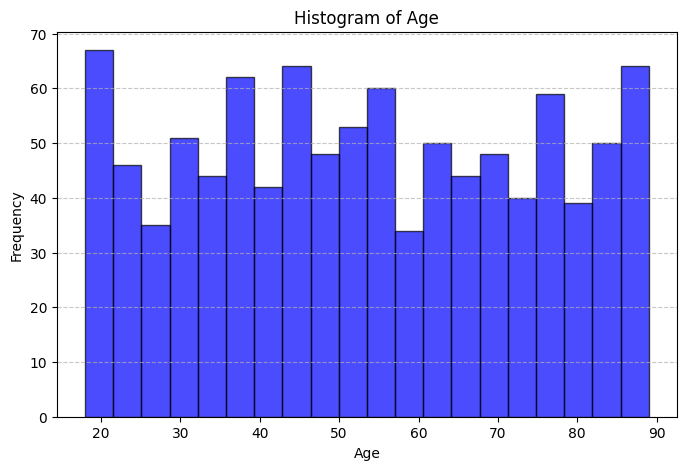

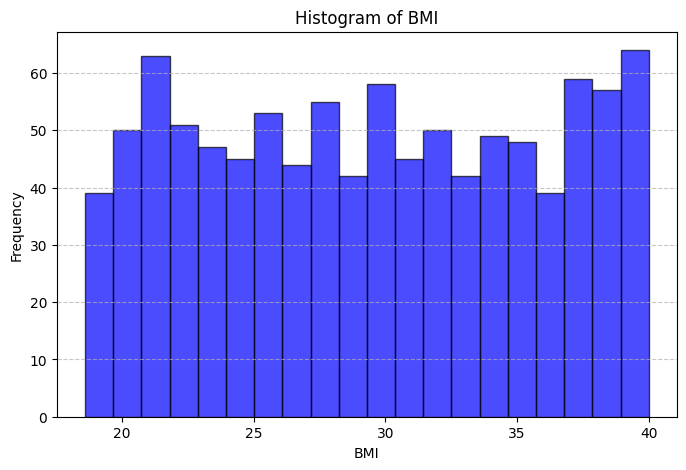

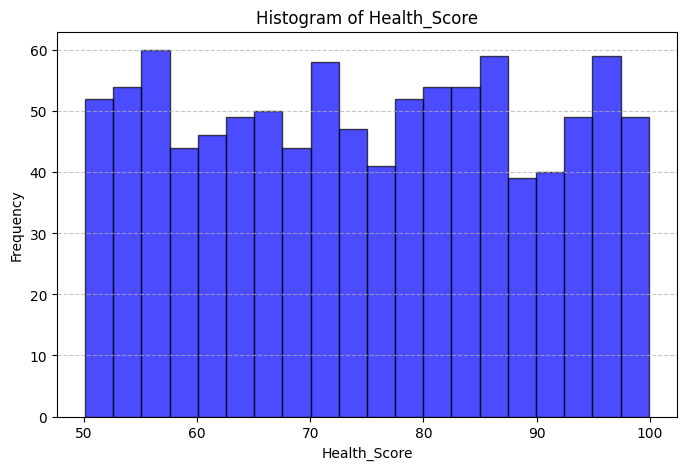

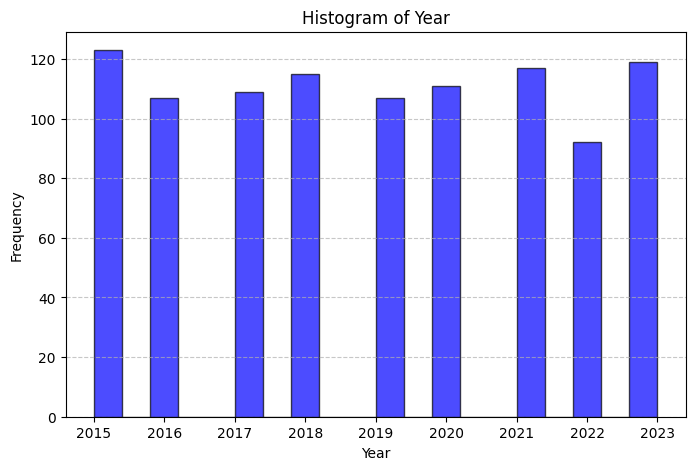

In [11]:
import matplotlib.pyplot as plt

# Identify numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Generate a histogram for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(data[column], bins=20, color='blue', alpha=0.7, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

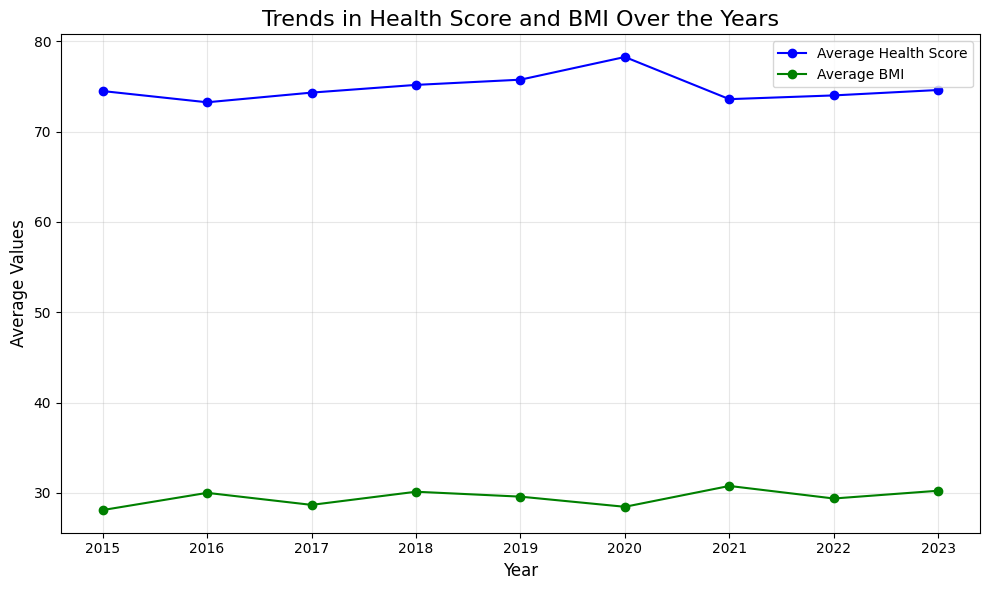

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Health_Data_Insights.csv'
data = pd.read_csv(file_path)  # Make sure to load the data

# Group data by Year and calculate average Health_Score and BMI
# Select only the numeric columns before calculating the mean
yearly_data = data.groupby('Year')[['Health_Score', 'BMI']].mean()

# Create the line chart
plt.figure(figsize=(10, 6))

# Plot Health Score trend
plt.plot(
    yearly_data.index,
    yearly_data['Health_Score'],
    marker='o',
    label='Average Health Score',
    color='blue'
)

# Plot BMI trend
plt.plot(
    yearly_data.index,
    yearly_data['BMI'],
    marker='o',
    label='Average BMI',
    color='green'
)

# Customize the chart
plt.title('Trends in Health Score and BMI Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Values', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.xticks(yearly_data.index, fontsize=10)  # Display year labels

# Show the chart
plt.tight_layout()
plt.show()

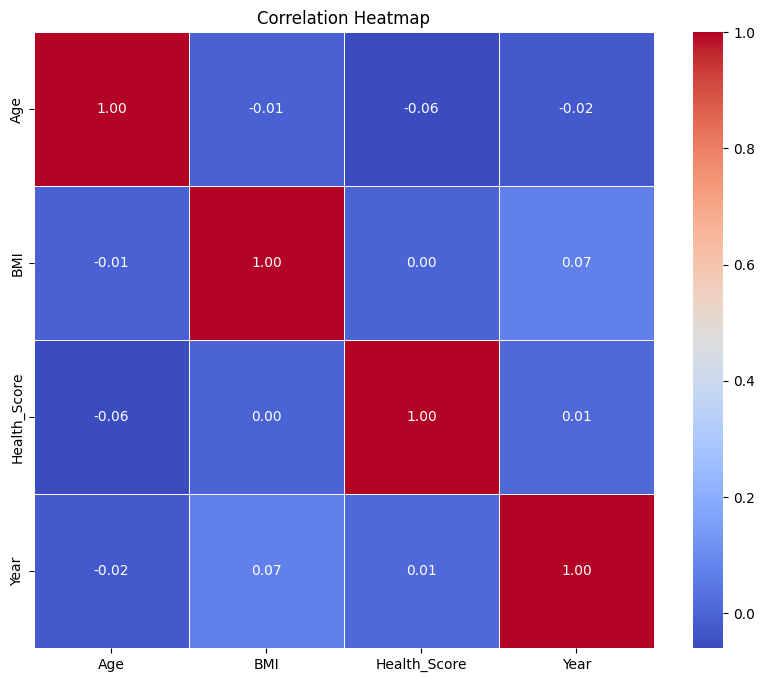

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numeric_columns].corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


<Figure size 1000x600 with 0 Axes>

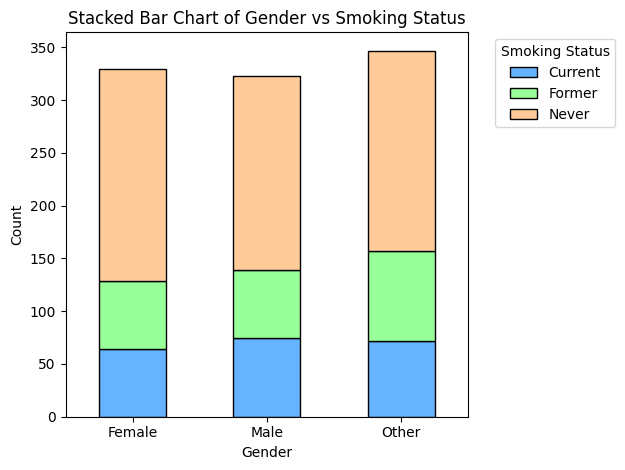

In [15]:
import matplotlib.pyplot as plt

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Create a stacked bar chart for two categorical columns (example: Gender and Smoking_Status)
# You can change this to any combination of categorical columns

plt.figure(figsize=(10, 6))

# Group the data by the two categorical columns and calculate the counts
contingency_table = pd.crosstab(data['Gender'], data['Smoking_Status'])

# Plot a stacked bar chart
contingency_table.plot(kind='bar', stacked=True, color=['#66b3ff', '#99ff99', '#ffcc99'], edgecolor='black')

# Adding labels and title
plt.title('Stacked Bar Chart of Gender vs Smoking Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Smoking Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()




---



## Submitting Your Work

Submit your work as usual.